## Computer Vision(CS 436, CS5310, EE513) Programming Assignment#3 Part#1

### Currently there are lots of professional cartoonizer applications available in the market but most of the them are not freeware, you don't need powerful rendering software or even years of experience to develop such an application(as you will see in this assignment) All you need is essentially a bilateral filter and some edge detection. You are allowed to use opencv for this assigment

## Step#1
### In this step we will be applying a bilateral filter on our input image. A bilateral filter is used for smoothening images and reducing noise, while preserving edges, because a bilateral filter smooths flat regions while keeping edges sharp, it is ideally suited to convert an RGB image into a cartoon. Unfortunately, bilateral filters are orders of magnitudes slower than other smoothing operators (e.g., Gaussian blur). Thus, if speed is important, it might be a good idea to operate on a down-scaled version of the original image first and then upscale it afterwards.

In [0]:
#required imports
import matplotlib
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline

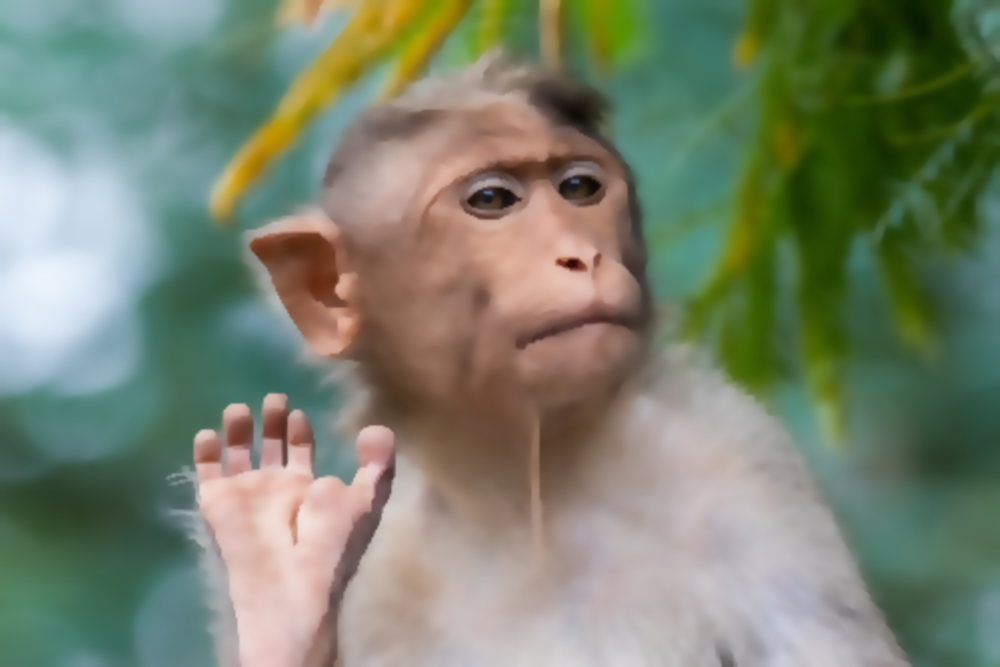

In [11]:
#TO DO
#step 1
#Use bilateral filter for edge-aware smoothing.
input_img = cv2.imread('input.jpg') # cv.imread(filename[, flags]) stored in BGR, flags like cv2.IMREAD_COLOR that reject alpha
h, w, _ = input_img.shape
num_down = 1 # number of downsampling steps 
num_bilateral =  4 # number of bilateral filtering steps
sigma_values = 40 # we need a strong cartoonish effect, for which the docs recommend larger sigma values 
d_value = 5

bilateral_result = input_img
# downsample image using Gaussian pyramid(see opencv 'pyrDown()' function)
# cv2.pyrDown(src[, dst[, dstsize[, borderType]]]) → dst
for i in range(num_down):
    bilateral_result = cv2.pyrDown(src=bilateral_result)

# repeatedly apply small bilateral filter (small diameter d < 5) instead of applying 
# one large filter (like d = 9) since that is slow 
# cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) → dst

for i in range(num_bilateral):
    bilateral_result = cv2.bilateralFilter(src=bilateral_result, d=d_value, sigmaColor=sigma_values, sigmaSpace=sigma_values)

# upsample image to original size (see opencv 'pyrUp()' function) with Laplacian pyramid
# for i in range(num_down): #upsample same number of times as downsampled
for i in range(num_down):
    bilateral_result = cv2.pyrUp(src=bilateral_result)

bilateral_result = bilateral_result[0:h, 0:w]
cv2_imshow(bilateral_result)

## Step#2### In this step we will blur the original image. This is considered as a pre-processing step before we move on towards the edge detection step. We will apply a median filter on the image, which replaces each pixel value with the median value of all the pixels in a small neighborhood.

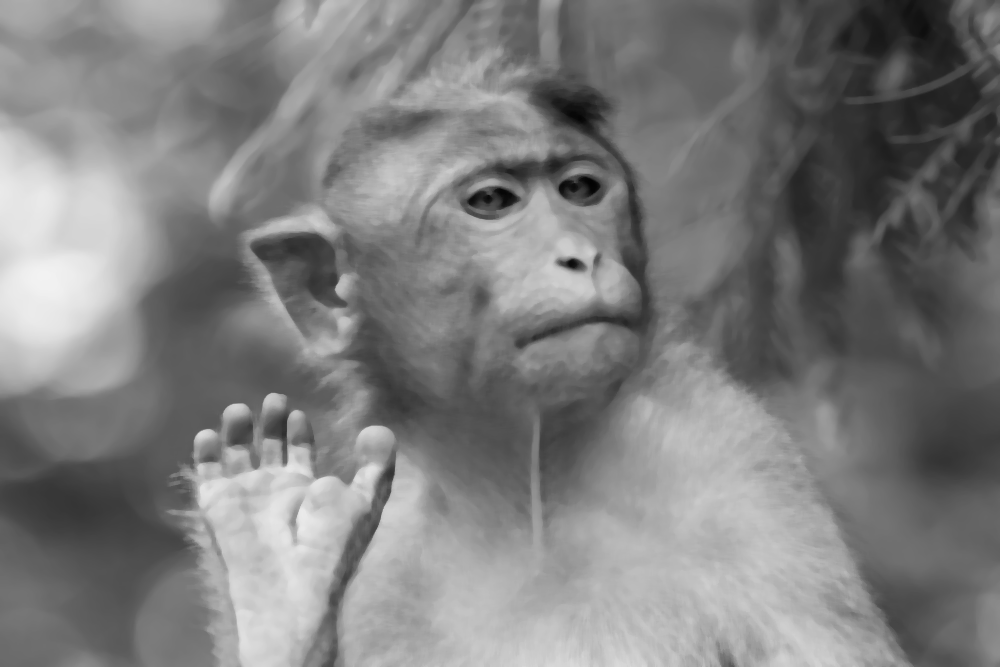

In [12]:
#TO DO
#step 2
# convert to grayscale and apply median blur
grayscale_img = cv2.cvtColor(src=input_img, code=cv2.COLOR_BGR2GRAY) # convert color space from
# cv2.cvtColor(src, code[, dst[, dstCn]]) → dst
# BGR (OpenCV standard - flipped RGB) to Grayscale (using color space conversion code COLOR_BG2GRAY)

# cv2.medianBlur(src, ksize[, dst]) → dst
preprocess_result = cv2.medianBlur(src = grayscale_img, ksize=7) # # median filter with ksize*ksize aperture
# from docs: ksize – aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...

cv2_imshow(preprocess_result)

## Step#3

### In this step we will create an edge mask from the output produced in step#2 using adaptive thresholding 

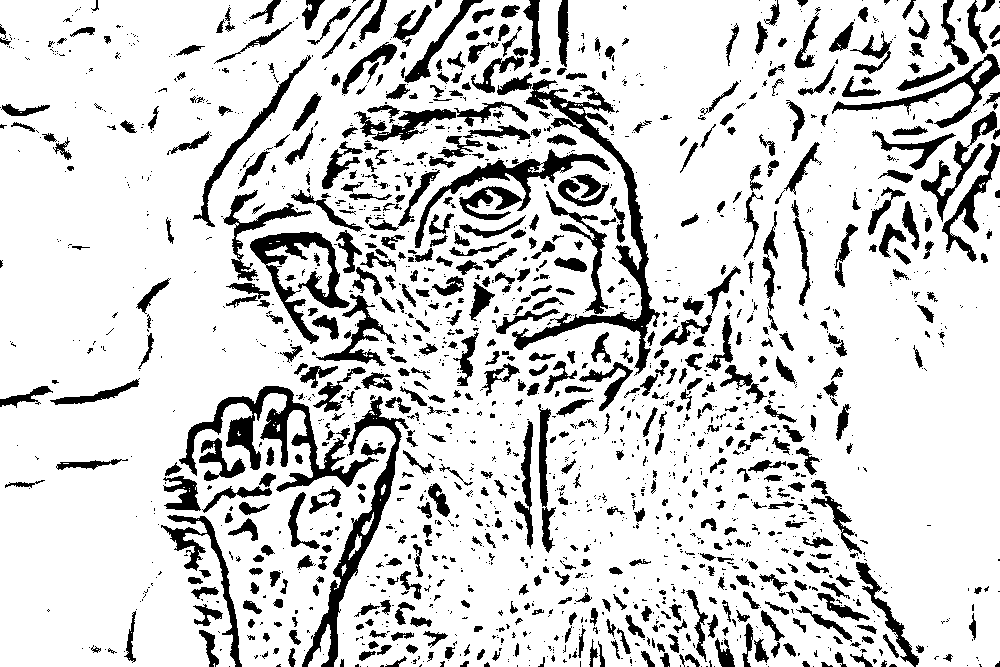

In [13]:
#TO DO
#step 3
# detect and enhance edges(see opencv 'adaptiveThreshold()' function)
# adaptiveThreshold(src - 8bit single channel, maxValue - max limit for pixel values
#, adaptiveMethod - algorithm, thresholdType - THRESH_BINARY or THRESH_INV, 
# blockSize - size of pixel neighborhood (odd 3,5,7..), C= constant used in formulae[, dst]) -> dst
edge_mask = cv2.adaptiveThreshold(src=preprocess_result, maxValue=255, 
adaptiveMethod= cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType= cv2.THRESH_BINARY, blockSize = 15, C=3) # grayscale to binary

cv2_imshow(edge_mask)

## Final Step

### In this step we will combine the output produced in step#1 and step#3 using a bitwise and operator to produce our final output.(Note: You need to convert output from step#3 to color first)

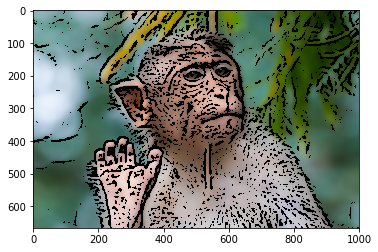

In [15]:
#TO DO
#Final Step
# convert back to color, bit-AND with color image
edge_mask_bgr = cv2.cvtColor(src=edge_mask, code=cv2.COLOR_GRAY2BGR) # to convert back to 3-channel image for the bitwise &
final = cv2.cvtColor(src=bilateral_result & edge_mask_bgr, code=cv2.COLOR_BGR2RGB) #both are bgr for &, convert bgr result to rgb for plt.imshow
plt.imshow(final)
plt.show()